## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9698757	total: 59.4ms	remaining: 59.3s
1:	learn: 0.9508146	total: 60.3ms	remaining: 30.1s
2:	learn: 0.9309880	total: 61.4ms	remaining: 20.4s
3:	learn: 0.9148680	total: 62.4ms	remaining: 15.5s
4:	learn: 0.8985499	total: 63.4ms	remaining: 12.6s
5:	learn: 0.8826556	total: 64.4ms	remaining: 10.7s
6:	learn: 0.8674852	total: 65.5ms	remaining: 9.29s
7:	learn: 0.8512596	total: 66.3ms	remaining: 8.23s
8:	learn: 0.8367475	total: 67.1ms	remaining: 7.39s
9:	learn: 0.8202213	total: 68ms	remaining: 6.73s
10:	learn: 0.8065879	total: 68.8ms	remaining: 6.19s
11:	learn: 0.7928132	total: 69.6ms	remaining: 5.73s
12:	learn: 0.7786064	total: 70.4ms	remaining: 5.34s
13:	learn: 0.7648765	total: 71.2ms	remaining: 5.02s
14:	learn: 0.7535073	total: 72ms	remaining: 4.73s
15:	learn: 0.7400712	total: 72.8ms	remaining: 4.48s
16:	learn: 0.7292027	total: 73.7ms	remaining: 4.26s
17:	learn: 0.7170774	total: 74.6ms	remaining: 4.07s
18:	learn: 0.7050586	total: 75.3ms	remaining: 3.

56:	learn: 0.4407157	total: 106ms	remaining: 1.75s
57:	learn: 0.4367029	total: 107ms	remaining: 1.74s
58:	learn: 0.4335664	total: 108ms	remaining: 1.72s
59:	learn: 0.4299628	total: 108ms	remaining: 1.7s
60:	learn: 0.4261913	total: 109ms	remaining: 1.68s
61:	learn: 0.4218244	total: 110ms	remaining: 1.67s
62:	learn: 0.4189155	total: 111ms	remaining: 1.65s
63:	learn: 0.4154382	total: 112ms	remaining: 1.64s
64:	learn: 0.4123477	total: 113ms	remaining: 1.62s
65:	learn: 0.4088908	total: 114ms	remaining: 1.61s
66:	learn: 0.4046838	total: 116ms	remaining: 1.61s
67:	learn: 0.4018382	total: 117ms	remaining: 1.61s
68:	learn: 0.3986091	total: 118ms	remaining: 1.59s
69:	learn: 0.3957229	total: 119ms	remaining: 1.58s
70:	learn: 0.3917040	total: 120ms	remaining: 1.56s
71:	learn: 0.3876358	total: 120ms	remaining: 1.55s
72:	learn: 0.3842425	total: 121ms	remaining: 1.54s
73:	learn: 0.3809867	total: 122ms	remaining: 1.52s
74:	learn: 0.3780510	total: 123ms	remaining: 1.51s
75:	learn: 0.3755897	total: 124m

158:	learn: 0.2528699	total: 191ms	remaining: 1.01s
159:	learn: 0.2520737	total: 192ms	remaining: 1.01s
160:	learn: 0.2512948	total: 193ms	remaining: 1.01s
161:	learn: 0.2507351	total: 194ms	remaining: 1s
162:	learn: 0.2503122	total: 195ms	remaining: 1s
163:	learn: 0.2496271	total: 196ms	remaining: 998ms
164:	learn: 0.2488285	total: 196ms	remaining: 994ms
165:	learn: 0.2481457	total: 197ms	remaining: 991ms
166:	learn: 0.2475600	total: 198ms	remaining: 988ms
167:	learn: 0.2467332	total: 199ms	remaining: 985ms
168:	learn: 0.2461666	total: 200ms	remaining: 983ms
169:	learn: 0.2450677	total: 201ms	remaining: 981ms
170:	learn: 0.2445932	total: 202ms	remaining: 977ms
171:	learn: 0.2440497	total: 202ms	remaining: 974ms
172:	learn: 0.2431740	total: 203ms	remaining: 972ms
173:	learn: 0.2426794	total: 204ms	remaining: 969ms
174:	learn: 0.2421662	total: 205ms	remaining: 967ms
175:	learn: 0.2413519	total: 206ms	remaining: 964ms
176:	learn: 0.2405860	total: 207ms	remaining: 962ms
177:	learn: 0.2399

287:	learn: 0.1832483	total: 296ms	remaining: 732ms
288:	learn: 0.1828436	total: 297ms	remaining: 731ms
289:	learn: 0.1826614	total: 298ms	remaining: 730ms
290:	learn: 0.1822523	total: 299ms	remaining: 728ms
291:	learn: 0.1817050	total: 300ms	remaining: 727ms
292:	learn: 0.1811385	total: 301ms	remaining: 725ms
293:	learn: 0.1806766	total: 301ms	remaining: 724ms
294:	learn: 0.1803020	total: 302ms	remaining: 723ms
295:	learn: 0.1797962	total: 303ms	remaining: 721ms
296:	learn: 0.1793465	total: 304ms	remaining: 720ms
297:	learn: 0.1790151	total: 305ms	remaining: 718ms
298:	learn: 0.1787226	total: 306ms	remaining: 716ms
299:	learn: 0.1785581	total: 306ms	remaining: 715ms
300:	learn: 0.1781722	total: 307ms	remaining: 713ms
301:	learn: 0.1778586	total: 308ms	remaining: 712ms
302:	learn: 0.1775725	total: 309ms	remaining: 710ms
303:	learn: 0.1772277	total: 309ms	remaining: 709ms
304:	learn: 0.1769464	total: 310ms	remaining: 707ms
305:	learn: 0.1766451	total: 311ms	remaining: 705ms
306:	learn: 

391:	learn: 0.1505780	total: 382ms	remaining: 592ms
392:	learn: 0.1504435	total: 383ms	remaining: 591ms
393:	learn: 0.1501095	total: 384ms	remaining: 590ms
394:	learn: 0.1499656	total: 385ms	remaining: 589ms
395:	learn: 0.1496709	total: 385ms	remaining: 588ms
396:	learn: 0.1494320	total: 386ms	remaining: 586ms
397:	learn: 0.1492537	total: 387ms	remaining: 585ms
398:	learn: 0.1491229	total: 388ms	remaining: 584ms
399:	learn: 0.1486559	total: 389ms	remaining: 583ms
400:	learn: 0.1485661	total: 389ms	remaining: 582ms
401:	learn: 0.1484568	total: 390ms	remaining: 580ms
402:	learn: 0.1482040	total: 391ms	remaining: 579ms
403:	learn: 0.1480428	total: 392ms	remaining: 578ms
404:	learn: 0.1477402	total: 393ms	remaining: 577ms
405:	learn: 0.1476371	total: 393ms	remaining: 576ms
406:	learn: 0.1475760	total: 394ms	remaining: 574ms
407:	learn: 0.1473256	total: 395ms	remaining: 573ms
408:	learn: 0.1471629	total: 396ms	remaining: 572ms
409:	learn: 0.1468408	total: 397ms	remaining: 571ms
410:	learn: 

519:	learn: 0.1240688	total: 487ms	remaining: 449ms
520:	learn: 0.1238045	total: 488ms	remaining: 448ms
521:	learn: 0.1236670	total: 488ms	remaining: 447ms
522:	learn: 0.1234862	total: 489ms	remaining: 446ms
523:	learn: 0.1231842	total: 490ms	remaining: 445ms
524:	learn: 0.1228409	total: 491ms	remaining: 444ms
525:	learn: 0.1225431	total: 492ms	remaining: 443ms
526:	learn: 0.1224417	total: 493ms	remaining: 442ms
527:	learn: 0.1222926	total: 493ms	remaining: 441ms
528:	learn: 0.1221188	total: 494ms	remaining: 440ms
529:	learn: 0.1218230	total: 495ms	remaining: 439ms
530:	learn: 0.1216566	total: 496ms	remaining: 438ms
531:	learn: 0.1214080	total: 497ms	remaining: 437ms
532:	learn: 0.1211152	total: 498ms	remaining: 436ms
533:	learn: 0.1209446	total: 499ms	remaining: 435ms
534:	learn: 0.1207459	total: 499ms	remaining: 434ms
535:	learn: 0.1207247	total: 500ms	remaining: 433ms
536:	learn: 0.1204428	total: 501ms	remaining: 432ms
537:	learn: 0.1202131	total: 502ms	remaining: 431ms
538:	learn: 

623:	learn: 0.1058403	total: 572ms	remaining: 345ms
624:	learn: 0.1055817	total: 573ms	remaining: 344ms
625:	learn: 0.1054125	total: 574ms	remaining: 343ms
626:	learn: 0.1052559	total: 575ms	remaining: 342ms
627:	learn: 0.1050533	total: 575ms	remaining: 341ms
628:	learn: 0.1049243	total: 576ms	remaining: 340ms
629:	learn: 0.1047596	total: 577ms	remaining: 339ms
630:	learn: 0.1047014	total: 578ms	remaining: 338ms
631:	learn: 0.1045456	total: 579ms	remaining: 337ms
632:	learn: 0.1044971	total: 579ms	remaining: 336ms
633:	learn: 0.1042307	total: 580ms	remaining: 335ms
634:	learn: 0.1040594	total: 581ms	remaining: 334ms
635:	learn: 0.1038633	total: 582ms	remaining: 333ms
636:	learn: 0.1036711	total: 582ms	remaining: 332ms
637:	learn: 0.1034650	total: 583ms	remaining: 331ms
638:	learn: 0.1034297	total: 584ms	remaining: 330ms
639:	learn: 0.1032307	total: 585ms	remaining: 329ms
640:	learn: 0.1031584	total: 585ms	remaining: 328ms
641:	learn: 0.1031314	total: 586ms	remaining: 327ms
642:	learn: 

748:	learn: 0.0889949	total: 676ms	remaining: 227ms
749:	learn: 0.0888681	total: 677ms	remaining: 226ms
750:	learn: 0.0887111	total: 678ms	remaining: 225ms
751:	learn: 0.0886048	total: 680ms	remaining: 224ms
752:	learn: 0.0885680	total: 681ms	remaining: 223ms
753:	learn: 0.0884634	total: 681ms	remaining: 222ms
754:	learn: 0.0882719	total: 682ms	remaining: 221ms
755:	learn: 0.0881891	total: 683ms	remaining: 220ms
756:	learn: 0.0880895	total: 684ms	remaining: 220ms
757:	learn: 0.0879866	total: 685ms	remaining: 219ms
758:	learn: 0.0879006	total: 686ms	remaining: 218ms
759:	learn: 0.0878177	total: 687ms	remaining: 217ms
760:	learn: 0.0876983	total: 687ms	remaining: 216ms
761:	learn: 0.0875728	total: 688ms	remaining: 215ms
762:	learn: 0.0873814	total: 689ms	remaining: 214ms
763:	learn: 0.0872409	total: 690ms	remaining: 213ms
764:	learn: 0.0872195	total: 691ms	remaining: 212ms
765:	learn: 0.0870543	total: 691ms	remaining: 211ms
766:	learn: 0.0869327	total: 692ms	remaining: 210ms
767:	learn: 

848:	learn: 0.0782675	total: 762ms	remaining: 135ms
849:	learn: 0.0781691	total: 763ms	remaining: 135ms
850:	learn: 0.0780574	total: 764ms	remaining: 134ms
851:	learn: 0.0779205	total: 764ms	remaining: 133ms
852:	learn: 0.0778266	total: 765ms	remaining: 132ms
853:	learn: 0.0776184	total: 766ms	remaining: 131ms
854:	learn: 0.0774458	total: 767ms	remaining: 130ms
855:	learn: 0.0773619	total: 768ms	remaining: 129ms
856:	learn: 0.0773208	total: 769ms	remaining: 128ms
857:	learn: 0.0772848	total: 769ms	remaining: 127ms
858:	learn: 0.0772069	total: 770ms	remaining: 126ms
859:	learn: 0.0771209	total: 771ms	remaining: 126ms
860:	learn: 0.0770523	total: 772ms	remaining: 125ms
861:	learn: 0.0770310	total: 773ms	remaining: 124ms
862:	learn: 0.0769331	total: 774ms	remaining: 123ms
863:	learn: 0.0768653	total: 774ms	remaining: 122ms
864:	learn: 0.0767486	total: 775ms	remaining: 121ms
865:	learn: 0.0766681	total: 776ms	remaining: 120ms
866:	learn: 0.0766315	total: 777ms	remaining: 119ms
867:	learn: 

975:	learn: 0.0670159	total: 867ms	remaining: 21.3ms
976:	learn: 0.0668650	total: 868ms	remaining: 20.4ms
977:	learn: 0.0667690	total: 869ms	remaining: 19.5ms
978:	learn: 0.0667043	total: 870ms	remaining: 18.7ms
979:	learn: 0.0666469	total: 870ms	remaining: 17.8ms
980:	learn: 0.0665433	total: 871ms	remaining: 16.9ms
981:	learn: 0.0664982	total: 872ms	remaining: 16ms
982:	learn: 0.0664796	total: 873ms	remaining: 15.1ms
983:	learn: 0.0664271	total: 874ms	remaining: 14.2ms
984:	learn: 0.0663600	total: 874ms	remaining: 13.3ms
985:	learn: 0.0662551	total: 875ms	remaining: 12.4ms
986:	learn: 0.0661861	total: 876ms	remaining: 11.5ms
987:	learn: 0.0661722	total: 877ms	remaining: 10.7ms
988:	learn: 0.0660850	total: 878ms	remaining: 9.76ms
989:	learn: 0.0660730	total: 879ms	remaining: 8.87ms
990:	learn: 0.0659645	total: 880ms	remaining: 7.99ms
991:	learn: 0.0658959	total: 881ms	remaining: 7.1ms
992:	learn: 0.0657993	total: 881ms	remaining: 6.21ms
993:	learn: 0.0657894	total: 882ms	remaining: 5.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

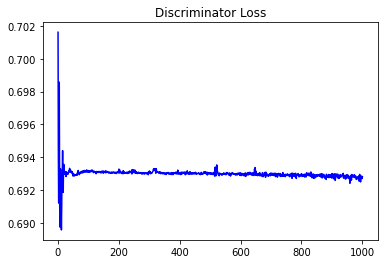

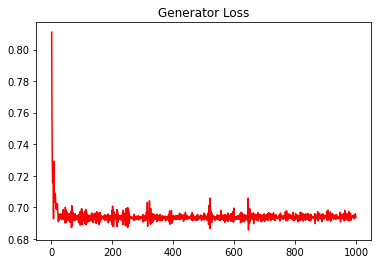

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08380839374603907


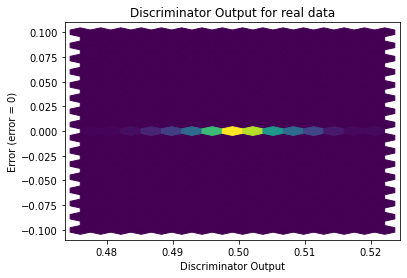

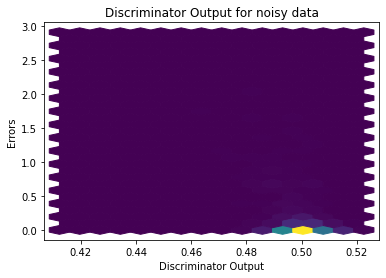

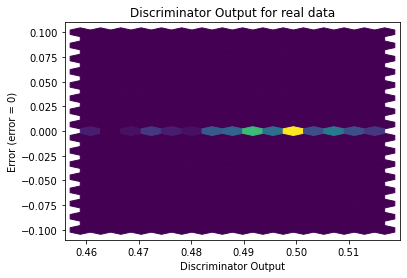

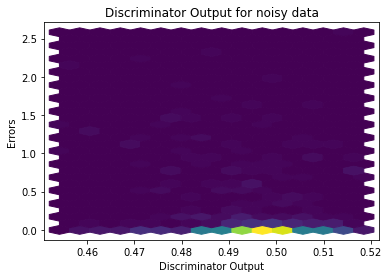

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


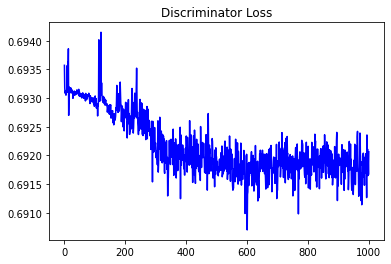

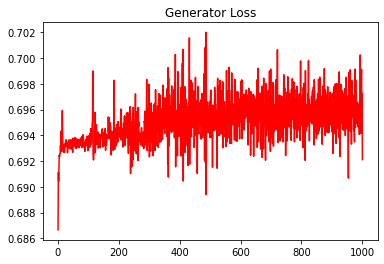

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08976081561626527


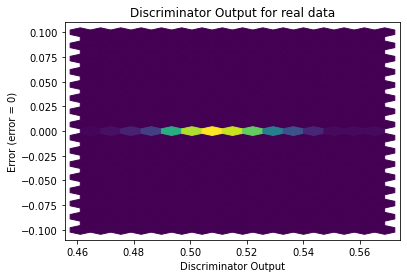

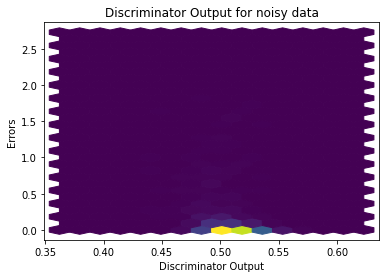

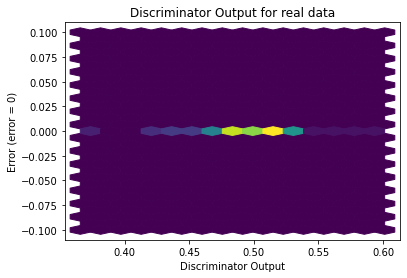

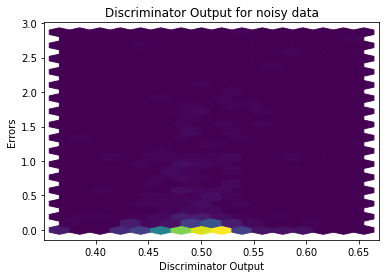

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2482]], requires_grad=True)
